# Nonlocality Breaking with Respect to the CHSH Inequality and Detector Erasure Errors



In [11]:
from context import QNetOptimizer as QNopt
from context import utilities

from pennylane import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [52]:
bell_data_files = utilities.get_data_files("../../script/data/chsh_erasure_errors/", r"bell_state.*")
print("num bell_state optimizations : ", len(bell_data_files))

arb_data_files = utilities.get_data_files("../../script/data/chsh_erasure_errors/", r"arb_state.*")
print("num arb_state optimizations : ", len(arb_data_files))

num bell_state optimizations :  7
num arb_state optimizations :  7


In [3]:
bell_data = utilities.analyze_data_two_param_scan(bell_data_files)
arb_data = utilities.analyze_data_two_param_scan(arb_data_files)

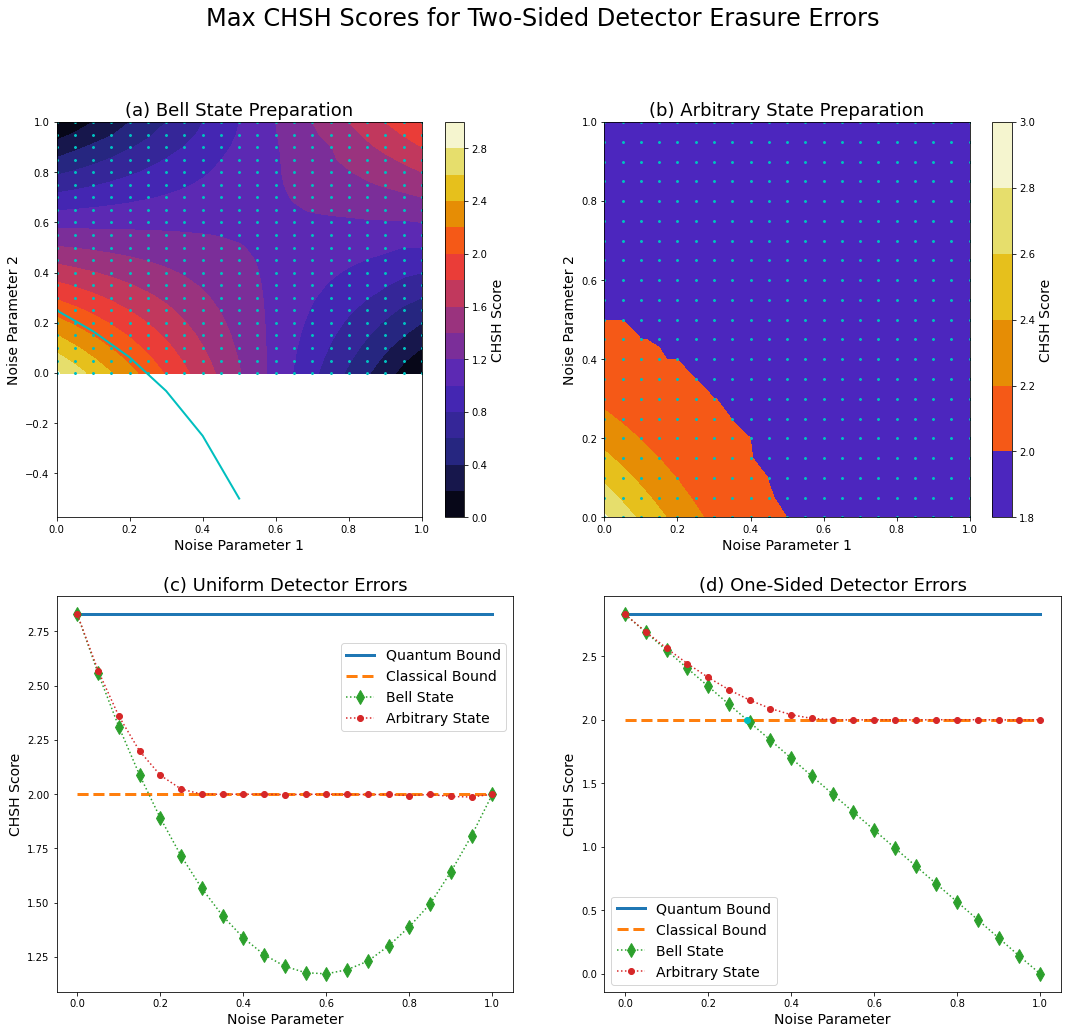

maximum difference between arbitrary and max entangled scores :  1.9999999999989502
minimum difference between arbitrary and max entangled scores :  -1.8139647363746292e-05


In [198]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(18,16))

fig.suptitle("Max CHSH Scores for Two-Sided Detector Erasure Errors", size=24)

norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 3, vcenter=2)
norm2 = mcolors.TwoSlopeNorm(vmin=1.8, vmax = 3, vcenter=2)


bell_plt = ax1.contourf(
    bell_data["x_mesh"],
    bell_data["y_mesh"],
    bell_data["max_scores"],
    levels=16,
    cmap="CMRmap",
    norm=norm
)

cbar1 = plt.colorbar(bell_plt, ax=ax1)
cbar1.set_label("CHSH Score", size=14)

xs = np.arange(0,0.51,0.1)
ys = [1-0.75/(1-x) for x in xs]
ax1.plot(xs,ys, "c-", linewidth=2)

ax1.set_title("(a) Bell State Preparation", size=18)
ax1.set_xlabel("Noise Parameter 1", size=14)
ax1.set_ylabel("Noise Parameter 2", size=14)

ax1.scatter(bell_data["x_mesh"], bell_data["y_mesh"], color="c", marker="x", s=4)

arb_plt = ax2.contourf(
    arb_data["x_mesh"],
    arb_data["y_mesh"],
    arb_data["max_scores"],
    levels=4, #[1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3],
    cmap="CMRmap",
    norm=norm2
)
cbar2 = plt.colorbar(arb_plt, ax=ax2)


ax2.scatter(arb_data["x_mesh"], arb_data["y_mesh"], color="c", marker="x", s=4)

cbar2.set_label("CHSH Score", size=14)

ax2.set_title("(b) Arbitrary State Preparation", size=18)
ax2.set_xlabel("Noise Parameter 1", size=14)
ax2.set_ylabel("Noise Parameter 2", size=14)

# Comparing uniform (diagonal) nosie data
arb_diag_scores = [arb_data["max_scores"][i][i] for i in range(bell_data["x_mesh"].shape[0])]
bell_diag_scores = [bell_data["max_scores"][i][i] for i in range(bell_data["x_mesh"].shape[0])]

param_range = bell_data["x_mesh"][0,:]

ax3.plot(param_range, [2*np.sqrt(2)]*len(param_range), linewidth=3, label="Quantum Bound")
ax3.plot(param_range, [2]*len(param_range), "--", linewidth=3, label="Classical Bound")
ax3.plot(param_range, bell_diag_scores, ":d", markersize=10, label="Bell State")
ax3.plot(param_range, arb_diag_scores, ":.", markersize=12, label="Arbitrary State")
ax3.legend(fontsize=14, loc="upper right", bbox_to_anchor=(1, 0.9))
ax3.set_title("(c) Uniform Detector Errors", size=18)
ax3.set_xlabel("Noise Parameter", size=14)
ax3.set_ylabel("CHSH Score", size=14)

# comparing one-sided noise data
arb_onesided_scores = [arb_data["max_scores"][0][i] for i in range(bell_data["x_mesh"].shape[0])]
bell_onesided_scores = [bell_data["max_scores"][0][i] for i in range(bell_data["x_mesh"].shape[0])]

ax4.plot(param_range, [2*np.sqrt(2)]*len(param_range), linewidth=3, label="Quantum Bound")
ax4.plot(param_range, [2]*len(param_range), "--", linewidth=3, label="Classical Bound")
ax4.plot(param_range, bell_onesided_scores, ":d", markersize=10, label="Bell State")
ax4.plot(param_range, arb_onesided_scores, ":.", markersize=12, label="Arbitrary State")
ax4.legend(fontsize=14)
ax4.set_title("(d) One-Sided Detector Errors", size=18)
ax4.set_xlabel("Noise Parameter", size=14)
ax4.set_ylabel("CHSH Score", size=14)

ax4.plot([1-np.sqrt(2)/2], [2], "c.", markersize=12)

plt.show()
print(
    "maximum difference between arbitrary and max entangled scores : ",
    max([max(diff) for diff in np.array(arb_data["max_scores"])-np.array(bell_data["max_scores"])])
)
print(
    "minimum difference between arbitrary and max entangled scores : ",
    min([min(diff) for diff in np.array(arb_data["max_scores"])-np.array(bell_data["max_scores"])])
)

In [34]:
bell_data["x_mesh"][0,:]

tensor([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ], requires_grad=True)

In [163]:
[bell_data["max_scores"][i][i] for i in range(arb_data["x_mesh"].shape[0])]


[2.828427116418796,
 2.5576554796883917,
 2.3110259710444057,
 2.088538597628356,
 1.890193359837561,
 1.715990257641621,
 1.565929290880586,
 1.4400101087634005,
 1.3382337447385049,
 1.2605597619098368,
 1.2071060381621606,
 1.1777121719889005,
 1.1724495639963521,
 1.1913553136875628,
 1.2309405451312518,
 1.3012026236479577,
 1.389635734702186,
 1.4947968017886966,
 1.642017239862363,
 1.8092801523352975,
 2.0000000000000004]

In [ ]:
bel